<a href="https://colab.research.google.com/github/Minarose/Intro2NeuralNet-ML/blob/main/Optimization_Coordinate_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimization, Coordinate Descent

## IMPORTAGE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

# for excercise 4
import autograd.numpy as np   
from autograd import grad 


# Random Search & Rosenbrock Banana Function

## 1.1 Random Search Algorithm

Here, `g` is the function we’re trying to minimize. `alpha choice` is the step length/learning
rate which can take 2 values, either the string ’diminishing’ or simply a numerical constant. `max its` is the maximum number of iterations to be taken and w the starting vector.
`num samples` is the number of random directions that we choose. In addition we like to be able to monitor the progression of the algorithm so we should keep track of the points the algorithm visits in `w_history` as well as the associated cost in `cost_history`. These two containers will
be returned by the function.

In [ ]:


def random_search(g,alpha_choice,max_its,w,num_samples):
    
    """
    A zero-order local optimization function that determines the descent direction from the 
    current kth step with the lowest cost evaluation. This function searches for a point locally around the current point 
    in a fixed number (P) of unit-length directions scaled by the steplength of choice 
    for the point with the the lowest evaluation using the cost function of choice.
    It proceeds to the point with the smallest evaluation for that iteration and 
    repeats the process by the assigned maximum number of iterations.
    
    Parameters
    ----------
    
    g : callable
        Cost function
    alpha_choice : IntOrStr
        Steplength/Learning rate
    max_its : int
        Maximum number of iterations
    w : vector
        Starting vector
    num_samples : int
        Number of random directions
        
    Return
    ------
  
        w_history : list
            a history of the points visited in each iteration with the lowest evaluation for all the iterations.
        cost_history : list
            a history of the lowest cost evaluation in each iteration for all the iterations.
    
    """
    
    w_history = []# history list of the points visited in each iteration with the lowest evaluation for all the iterations
    cost_history = []# history list of the lowest cost evaluation of the points visited in each iteration for all the iterations
    alpha = 0# steplength/learning variable reassigned if input alpha_choice is 'diminishing'
    
    # Iterate through the kth step for each max_its number of iterations
    for k in range(1,max_its+1): 
        # if the alpha_choice input is the string 'diminishing' steplength rule
        # alpha is 1/k for each iteration
        if alpha_choice == 'diminishing': 
            alpha = 1/float(k)
        # If alpha_choice input is an integer value assign the alpha value
        # as that integer
        else:
            alpha = alpha_choice
        
        # add the current position to the history list of positions
        w_history.append(w)
        # add the cost evaluation of that position to the history 
        # list of cost evaluation
        cost_history.append(g(w))
        
        # Proceed from current position by constructing a set of random directions 
        # that have the same size as the starting vector (number of directions 
        # is assigned by num_samples)
        rndm_directions = np.random.randn(num_samples,np.size(w))
        # Normalize the directions in the set
        normalization = np.sqrt(np.sum(rndm_directions*rndm_directions,axis = 1))[:,np.newaxis]
        rndm_directions = rndm_directions/normalization
        
        # From the current starting vector, compute the candidate points by
        # scaling the set of directions by the steplength alpha and adding
        # it to the current vector
        w_next = w + alpha*rndm_directions
        
        # evaluate the cost function for each candidate point
        evals = np.array([g(w_val) for w_val in w_next])
        
        # find the candidate point with lowest cost evaluation for the best 
        # direction of descent
        indices = np.argmin(evals)
        if g(w_next[indices]) < g(w):
            
            d = rndm_directions[indices,:] 
            
            # Proceed from the current vector position in the best descent 
            # direction found for this iteration
            w = w + alpha*d
        
    # record the new vector position in w_history and the cost evaluation for 
    # that positition in the cost_history
    w_history.append(w)
    cost_history.append(g(w))
    # Return updated lists to monitor progression of the algorithm
    return weight_history,cost_history

## 1.2 Random Search Implementation #1 ($\alpha$ = 1)

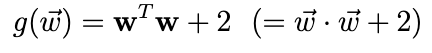

In [ ]:
# define parameters
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;

# run random search algorithm 
w_history,cost_history = random_search(g,alpha_choice,max_its,w,num_samples)

### Plots of w_history & cost_history

#### Weight History of g($\omega$) ($\alpha$ = 1)

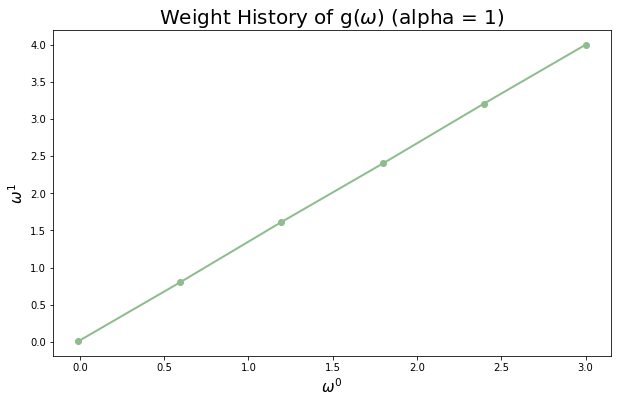

In [ ]:
w_historyarray = np.array(w_history)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Weight History of g($\omega$) (alpha = 1)", fontsize = 20)
ax.set_xlabel('$\omega^0$',fontsize = 15)
ax.set_ylabel('$\omega^1$', fontsize = 15)
plt.plot (w_historyarray[:,:1],w_historyarray[:,1:], color = 'darkseagreen',linewidth=2.0, marker = 'o')
plt.show()

#### Cost History of g($\omega$) ($\alpha$ = 1)

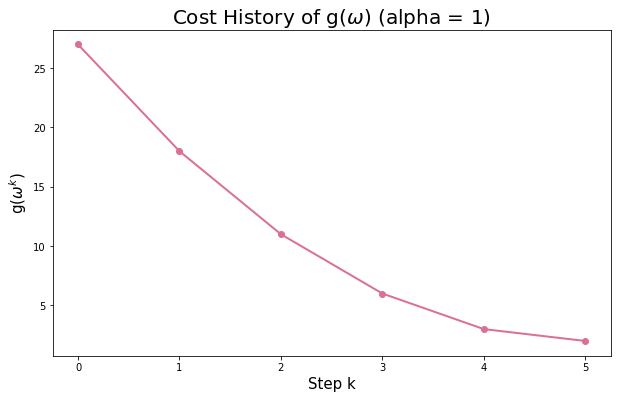

In [ ]:
Ncost = np.arange(0, len(cost_history))# Set up values for x-axis of plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega$) (alpha = 1)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g$(\omega^k)$', fontsize = 15)
ax.plot(Ncost, cost_history, color = 'palevioletred',linewidth=2.0, marker = 'o')
plt.show()

## 1.3 Random Search Implementation #2 ($\alpha$ = 0.3)

In [ ]:
# define parameters
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 0.3; w = np.array([3,4]); num_samples = 1000; max_its = 5;

# run random search algorithm 
w_history2,cost_history2 = random_search(g,alpha_choice,max_its,w,num_samples)

#### Weight History of g($\omega$) ($\alpha$ = 0.3)

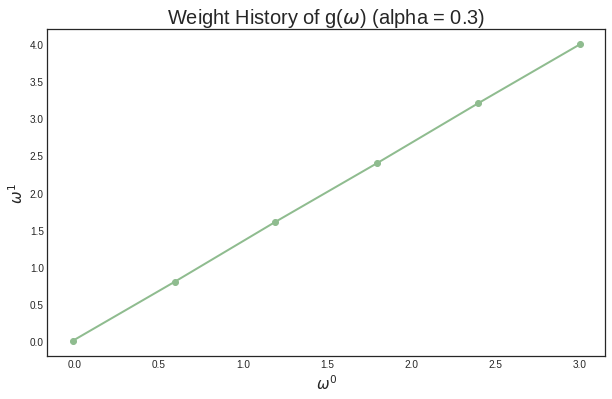

In [ ]:
w_historyarray2 = np.array(w_history2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Weight History of g($\omega$) (alpha = 0.3)", fontsize = 20)
ax.set_xlabel('$\omega^0$',fontsize = 15)
ax.set_ylabel('$\omega^1$', fontsize = 15)
plt.plot (w_historyarray2[:,:1],w_historyarray2[:,1:], color = 'darkseagreen',linewidth=2.0, marker = 'o')
plt.show()

#### Cost History of g($\omega$) ($\alpha$ = 0.3)

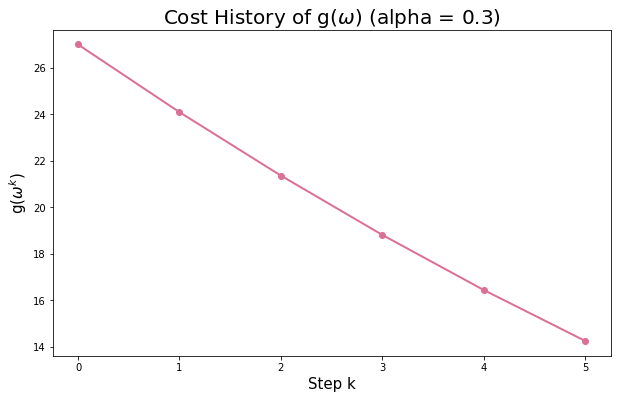

In [ ]:
Ncost2 = np.arange(0, len(cost_history2))# Set up values for x-axis of plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega$) (alpha = 0.3)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g$(\omega^k)$', fontsize = 15)
ax.plot(Ncost2, cost_history2, color = 'palevioletred',linewidth=2.0, marker = 'o')
plt.show()

#### Did the results improve with $\alpha$ = 0.3?

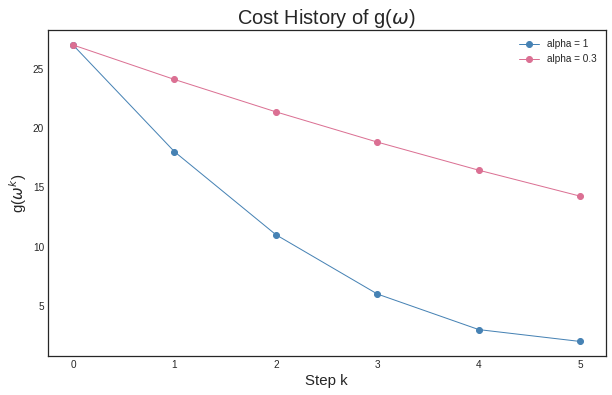

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega$)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega^k$)', fontsize = 15)

alpha1, = plt.plot(Ncost, cost_history, color = 'steelblue',linewidth=1.0, marker = 'o', alpha=1, label='alpha = 1')
alphadim, = plt.plot(Ncost2, cost_history2, color = 'palevioletred',linewidth=1.0, marker = 'o', alpha=1, label='alpha = 0.3')
plt.legend(handles=[alpha1, alphadim])
plt.show()


When we repeat the analysis with a smaller value for the steplength of $\alpha$ = 0.3, the results do no improve relative to a steplength value of $\alpha$ = 1. By comparing the plots of each run's cost history, we can observe that the larger fixed value of $\alpha$ = 1 not only induces a more rapid minimization of the cost function to a value of 2.00 but also leads to a more proper convergence to that loss value.


## 1.5 Random Search Implementation with the Rosenbrock Banana Function

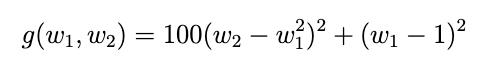

This function has a minimun at ($\omega_{1}$, $\omega_{2}$) = (1;1). Make two runs with `num_samples` = 1000; `max_its` = 50 ;starting from the point (2;2).  

First run with a  fixed step length of $\alpha$ = 1 then witha diminishing steplength $\alpha$ = 1/*k*.  Compare the two runs by plotting the `cost_history`.  Make a contour plot of the g($\omega_{1}$, $\omega_{2}$) and overlay `w_history`.

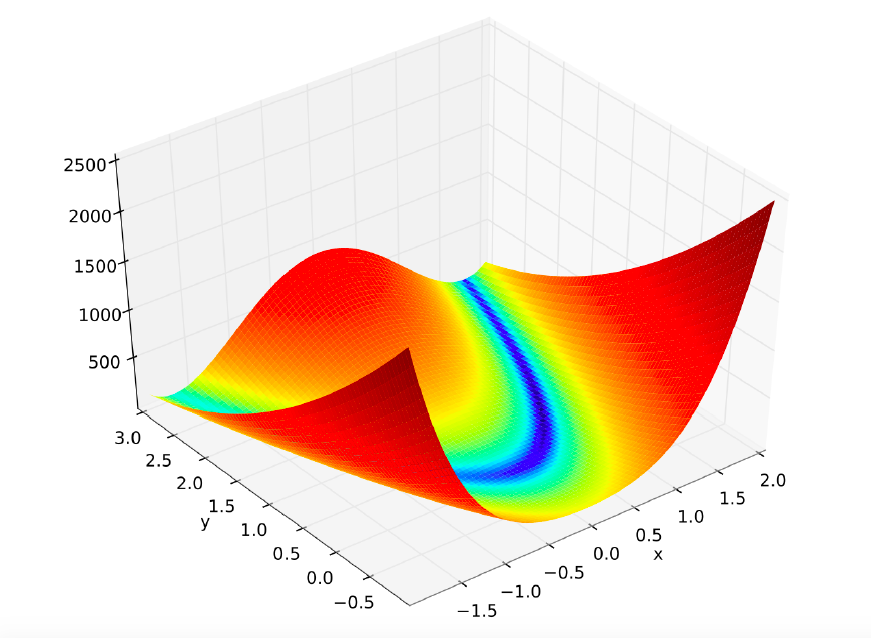

#### Run #1 ($\alpha$ = 1)

In [ ]:
# define parameters
g = lambda w: 100*((w[1]-w[0]**2)**2)+(w[0]-1)**2
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;

# run random search algorithm 
w_history151,cost_history151 = random_search(g,alpha_choice,max_its,w,num_samples)

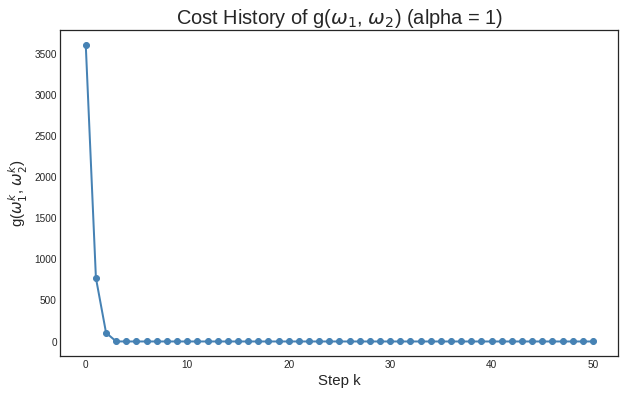

In [ ]:
Ncost151 = np.arange(0, len(cost_history151))# Set up values for x-axis of plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega_{1}$, $\omega_{2}$) (alpha = 1)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 15)
ax.plot(Ncost151, cost_history151, color = 'steelblue',linewidth=2.0, marker = 'o')
plt.show()

#### Run #2 ($\alpha$ = 1/*k*)

In [ ]:
# define parameters
g = lambda w: 100*((w[1]-w[0]**2)**2)+(w[0]-1)**2
alpha_choice = 'diminishing'; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;

# run random search algorithm 
w_history152,cost_history152 = random_search(g,alpha_choice,max_its,w,num_samples)

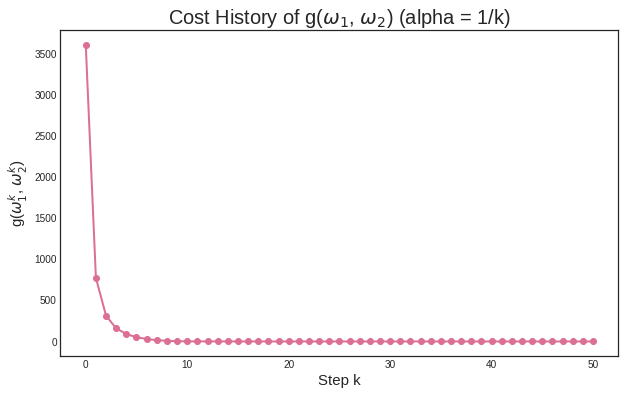

In [ ]:
Ncost152 = np.arange(0, len(cost_history152))# Set up values for x-axis of plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega_{1}$, $\omega_{2}$) (alpha = 1/k)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega_{1}^k$, $\omega_{2}^k$) ', fontsize = 15)
ax.plot(Ncost152, cost_history152, color = 'palevioletred',linewidth=2.0, marker = 'o')
plt.show()

#### Run #1 ($\alpha$ = 1) vs. Run#2 ($\alpha$ = 1/*k*)

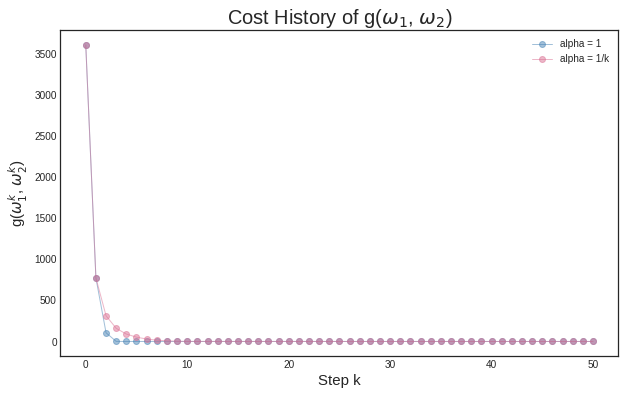

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega_{1}$, $\omega_{2}$)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 15)
#plt.plot(Ncost152, cost_history152, color = 'hotpink',linewidth=2.0, marker = 'o')



alpha1, = plt.plot(Ncost151, cost_history151, color = 'steelblue',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1')
alphadim, = plt.plot(Ncost152, cost_history152, color = 'palevioletred',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1/k')
plt.legend(handles=[alpha1, alphadim])
plt.show()

The comparison of the cost histories show that the analysis using the diminishing steplength of $\alpha$ = 1/k converges to a minimum loss value quicker than the analysis with the fixed steplength of $\alpha$ = 1.

#### Contour plot of g($\omega_{1}$, $\omega_{2}$) with `w_history` overlay.

In [ ]:
def f(x, y):
    return 100*((y-x**2)**2)+(x-1)**2

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [ ]:
w_historyarray152 = np.array(w_history152)

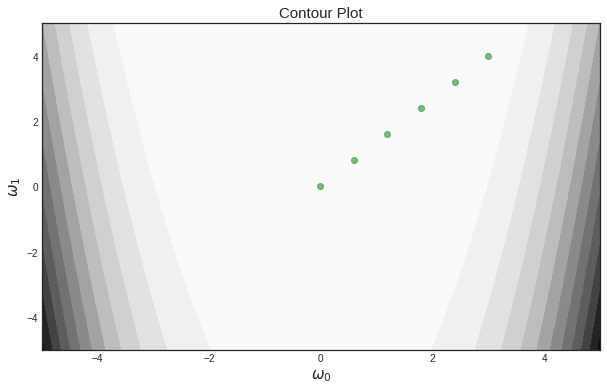

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.contourf(X, Y, Z,12)
ax.set_title('Contour Plot', fontsize = 15)
ax.set_xlabel('$\omega_{0}$', fontsize = 15)
ax.set_ylabel('$\omega_{1}$', fontsize = 15)
plt.scatter(w_historyarray152[:,:1],w_historyarray152[:,1:], color = 'green',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1')
plt.show()

## 1.6 Random Search Implementation with the 6-hump camel function

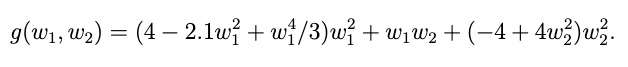

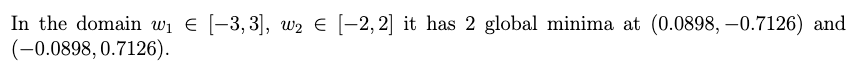

#### Run #1 ($\alpha$ = 1)

In [ ]:
# define parameters
g = lambda w: ((4-(2.1*(w[0]**2))+((1/3)*(w[0]**4)))*(w[0]**2)) + w[0]*w[1] + (-4+4*(w[1]**2)*(w[1]**2))
alpha_choice = 1; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;

# run random search algorithm 
w_history161,cost_history161 = random_search(g,alpha_choice,max_its,w,num_samples)

#### Run #2 ( 𝛼  = 1/k)

In [ ]:
# define parameters
g = lambda w: ((4-(2.1*(w[0]**2))+((1/3)*(w[0]**4)))*(w[0]**2)) + w[0]*w[1] + (-4+4*(w[1]**2)*(w[1]**2))
alpha_choice = 'diminishing'; w = np.array([-2,-2]); num_samples = 1000; max_its = 50;

# run random search algorithm 
w_history162,cost_history162 = random_search(g,alpha_choice,max_its,w,num_samples)

#### Run #1 ($\alpha$ = 1) vs. Run#2 ($\alpha$ = 1/*k*)

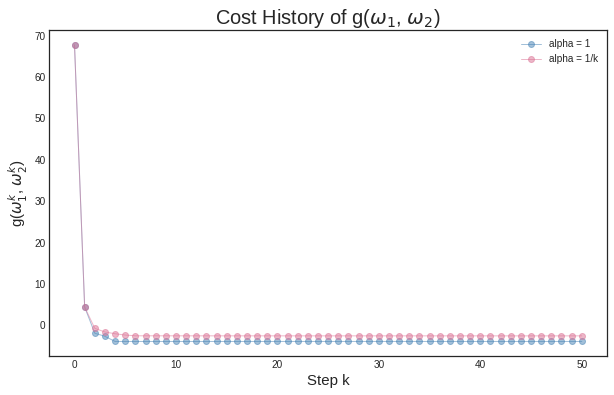

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Cost History of g($\omega_{1}$, $\omega_{2}$)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 15)
#plt.plot(Ncost152, cost_history152, color = 'hotpink',linewidth=2.0, marker = 'o')
Ncost161 = np.arange(0, len(cost_history161))
Ncost162 = np.arange(0, len(cost_history162))

alpha1, = plt.plot(Ncost161, cost_history161, color = 'steelblue',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1')
alphadim, = plt.plot(Ncost162, cost_history162, color = 'palevioletred',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1/k')
plt.legend(handles=[alpha1, alphadim])
plt.show()

The comparison of the cost histories show that the cost history of the analysis with a diminishing steplength and a fixed steplength do not appear to converge to the same minimum loss value after 50 steps. In addition, the analysis with the fixed steplength of $\alpha$ = 1 has a lower loss evaluation than the analysis with the diminishing steplength of $\alpha$ = 1/k.

#### Contour plot of g($\omega_{1}$, $\omega_{2}$) with `w_history` overlay.

In [ ]:
def f(x, y):
    return ((4-(2.1*(x**2))+((1/3)*(x**4)))*(x**2)) + x*y + (-4+4*(y**2)*(y**2))

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


In [ ]:
w_historyarray162 = np.array(w_history162)

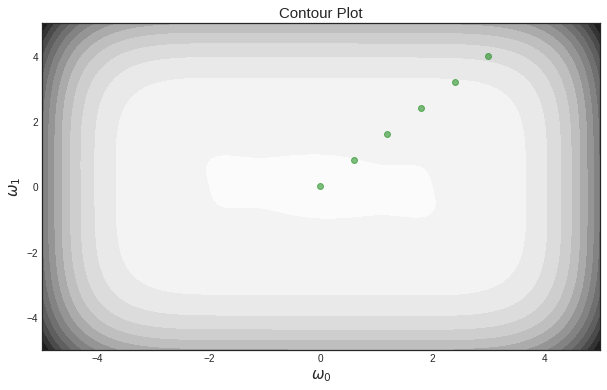

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.contourf(X, Y, Z,15)
ax.set_title('Contour Plot', fontsize = 15)
ax.set_xlabel('$\omega_{0}$', fontsize = 15)
ax.set_ylabel('$\omega_{1}$', fontsize = 15)
plt.scatter(w_historyarray162[:,:1],w_historyarray162[:,1:], color = 'green',linewidth=1.0, marker = 'o', alpha=0.5, label='alpha = 1')
plt.show()

# Excercise 2: Curse of Dimensionality

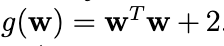

In [ ]:
#curse of dimensionality probability function#function only for N1-25
def curse_dims(g,w,P,min_dimensionsize,max_dimensionsize):

    N = np.array([1]) #initialize input vector with dimension 1
    
    probabilities ={}
    
    for x in P:#loop through number of randomly generated directions
        
        prob_n_direction = {}
        
        
        
        for y in range (min_dimensionsize-1,max_dimensionsize):#iterate through dimension of starting vector
            
            probdim = 0 
            
            r = np.array (y*[0])#make extension array based on dimesnion 'y'
            w = np.append(N,r)# make starting vector with dimension of choice by appending starting array with extension array

            ################ generate random directions based on P and array dimension
            directions = np.random.randn(x,np.size(w))
            norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
            directions = directions/norms 

            ############determine if direction is descent     

            # compute all new candidate points
            w_candidates = w + directions
    

            # evaluate the cost function for each candidate point
            evals = np.array([g(w_val) for w_val in w_candidates])
 
            
            for z in evals:
                if z < g(w):
                    # pluck out best descent direction
                    probdim += 1
                    
            prob_n_direction[y+1] = float(probdim)/float(x)
            
        probabilities[x] = prob_n_direction
    return probabilities

          

In [ ]:
g = lambda w: np.dot(w.T,w) + 2
min_dimensionsize = 1
max_dimensionsize = 25
P =  [10,100,1000,10000] #create list of number of directions to iterate through
probabilities1 = curse_dims(g,w,P, min_dimensionsize,max_dimensionsize)

### Graph P Curves

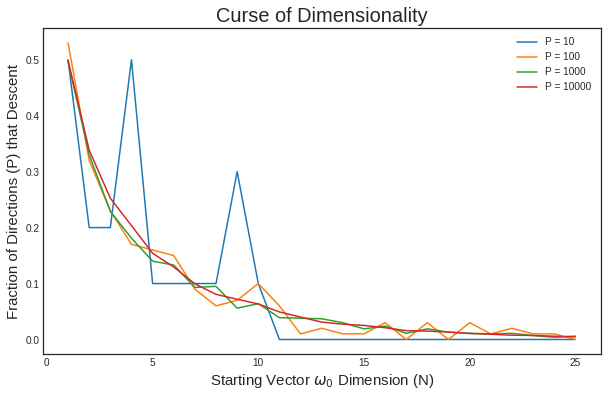

In [ ]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Curse of Dimensionality", fontsize = 20)
ax.set_xlabel('Starting Vector $\omega_{0}$ Dimension (N)',fontsize = 15)
ax.set_ylabel('Fraction of Directions (P) that Descent', fontsize = 15)
lists1 = sorted(probabilities1[10].items())
lists2 = sorted(probabilities1[100].items()) # sorted by key, return a list of tuples
lists3 = sorted(probabilities1[1000].items())
lists4 = sorted(probabilities1[10000].items())

x1, y1 = zip(*lists1)
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
x3, y3 = zip(*lists3)
x4, y4 = zip(*lists4)

plot1, = plt.plot(x1, y1, label='P = 10')
plot2, = plt.plot(x2, y2, label='P = 100')
plot3, = plt.plot(x3, y3, label='P = 1000')
plot4, = plt.plot(x4, y4, label='P = 10000')
plt.legend(handles=[plot1, plot2, plot3, plot4])
plt.show()

As the dimensions of the starting vector increase and the number of random directions generated from that vector increases the fraction of directions that are descent begin to decrease more rapidly and consistently converging to values less than 1%.

# Excercise 3: Coordinate Search & Coordinate Descent

In high dimensions random search is no longer efficient. We therefore want to look at coor-
dinate search and coordinate descent. For coordinate search, instead of generating P random
directions we only look for descent among the N coordinate directions. For coordinate descent
we randomly go through the coordinate directions and the first time we find a descent we use
it.

## 3.1 Coordinate Search & Coordinate Descent Functions

In [ ]:

def coordinate_search(g,alpha_choice,max_its,w):
    
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history


def coordinate_descent(g,alpha_choice,max_its,w):  
    
    # run coordinate search
    N = np.size(w)
    
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # random shuffle of coordinates
        c = np.random.permutation(N)
        
        # forming the dirction matrix out of the loop
        cost = g(w)
        
        # loop over each coordinate direction
        for n in range(N):
            direction = np.zeros((N,1)).flatten()
            direction[c[n]] = 1
     
            # record weights and cost evaluation
            weight_history.append(w)
            cost_history.append(cost)

            # evaluate all candidates
            evals =  [g(w + alpha*direction)]
            evals.append(g(w - alpha*direction))
            evals = np.array(evals)

            # if we find a real descent direction take the step in its direction
            ind = np.argmin(evals)
            if evals[ind] < cost_history[-1]:
                # take step
                w = w + ((-1)**(ind))*alpha*direction
                cost = evals[ind]
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

## 3.2 Implementation

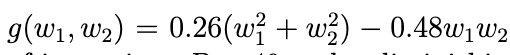

In [ ]:
g = lambda w: 0.26*(w[0]**2 + w[1]**2) - 0.48*w[0]*w[1]

# run coordinate search algorithm 
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_1,cost_history_1 = coordinate_search(g,alpha_choice,max_its,w)

# run coordinate descent algorithm
alpha_choice = 'diminishing'; w = np.array([3,4]); max_its = 40;
weight_history_2,cost_history_2 = coordinate_descent(g,alpha_choice,max_its,w)

### Coordinate Search vs. Coordinate Descent

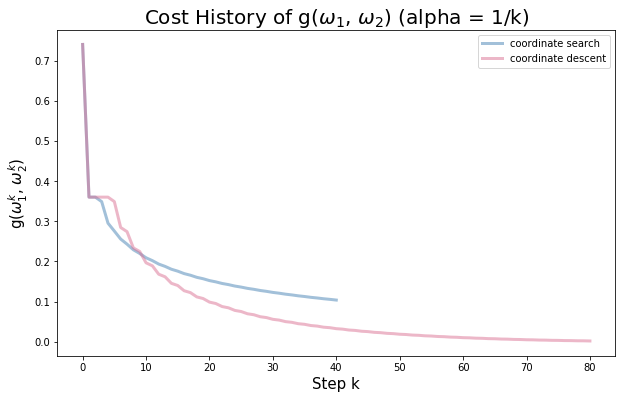

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Cost History of g($\omega_{1}$, $\omega_{2}$) (alpha = 1/k)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega_{1}^k$, $\omega_{2}^k$)', fontsize = 15)

Ncost321 = np.arange(0, len(cost_history_1))
Ncost322 = np.arange(0, len(cost_history_2))

alpha1, = plt.plot(Ncost321, cost_history_1, color = 'steelblue',linewidth=3.0, alpha=0.5, label='coordinate search')
alphadim, = plt.plot(Ncost322, cost_history_2, color = 'palevioletred',linewidth=3.0, alpha=0.5, label='coordinate descent')
plt.legend(handles=[alpha1, alphadim])
plt.show()

# Excercise 4: Gradient Descent

In [ ]:

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return cost_history

We now want to find the minimum of 
$$g(w)=\frac{1}{50}(w^4+w^2+10w)$$ using the above gradient descent. Make three separate runs using a step length of $\alpha$=1,0.01 and 0.01 starting from $w^0=2$. Plot the resulting cost histories. Which step length works best for this particular function and initial point ?

In [ ]:
g = lambda w: 1/float(50)*(w**4 + w**2 + 10*w)  

# run gradient descent 
w = 2.; alpha = 1; max_its = 100;
cost_history411 = gradient_descent(g,alpha,max_its,w)


In [ ]:
w = 2.; alpha = 0.1; max_its = 100;
cost_history412 = gradient_descent(g,alpha,max_its,w)

In [ ]:
w = 2.; alpha = 0.01; max_its = 100;
cost_history413 = gradient_descent(g,alpha,max_its,w)

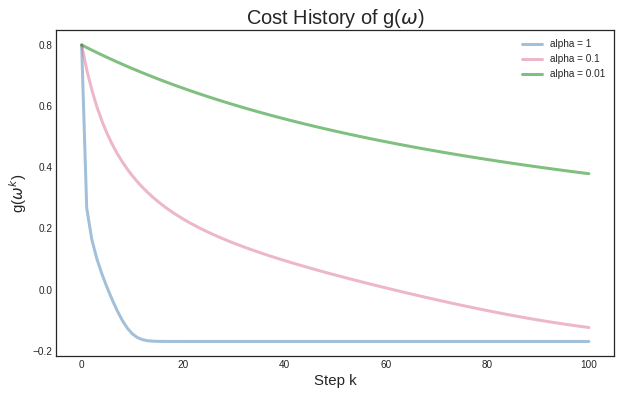

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title("Cost History of g($\omega$)", fontsize = 20)
ax.set_xlabel('Step k',fontsize = 15)
ax.set_ylabel('g($\omega^k$)', fontsize = 15)

Ncost411 = np.arange(0, len(cost_history411))
Ncost412 = np.arange(0, len(cost_history412))
Ncost413 = np.arange(0, len(cost_history413))

alpha1, = plt.plot(Ncost411, cost_history411, color = 'steelblue',linewidth=3.0, alpha=0.5, label='alpha = 1')
alpha2, = plt.plot(Ncost412, cost_history412, color = 'palevioletred',linewidth=3.0, alpha=0.5, label='alpha = 0.1')
alpha3, = plt.plot(Ncost413, cost_history413, color = 'green',linewidth=3.0, alpha=0.5, label='alpha = 0.01')
plt.legend(handles=[alpha1, alpha2,alpha3])
plt.show()

By comparing the plots of each run's cost history, we can observe that a steplength value of 𝛼  = 1 works best at inducing a rapid minimization of the cost function and converging towards that more carefully. On the other hand, a steplength value of 𝛼  = 0.1 or 0.01 may be too large in this case as we observe the gradient becomes negative when the gradient descent algorithm takes steps in the opposite direction in an attemp to localize a solution. 